# Various analysis

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_57831/2714380587.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


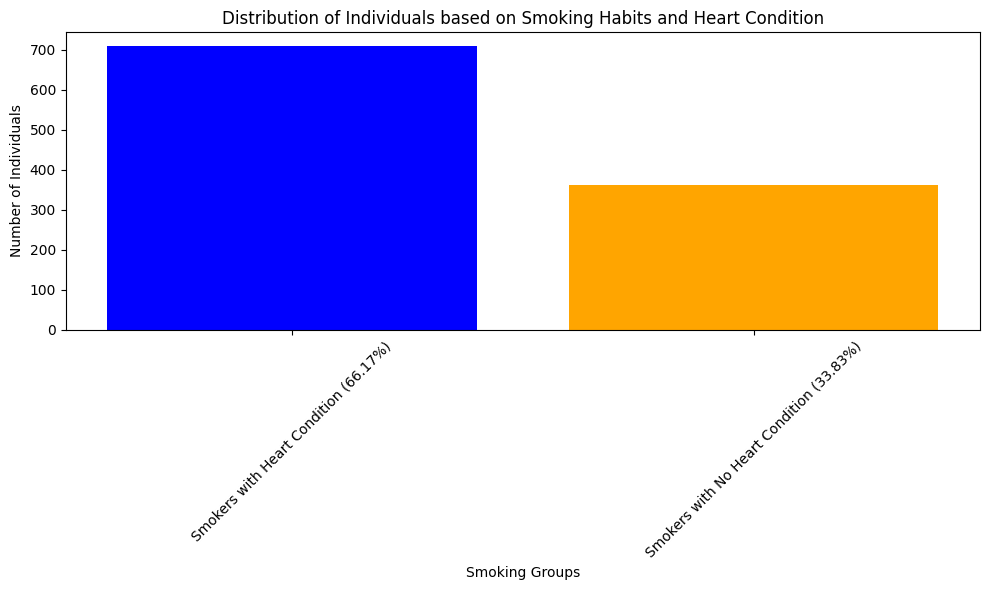

In [22]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Read the data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM cdc_cigar_use"
df = pd.read_sql(query, conn)
conn.close()

# Filter the data based on smoking habits and heart condition
df_encoded = pd.get_dummies(df, columns=['ShortQuestionText'])
df_encoded['Has_Heart_Condition'] = df_encoded['Lesser_Risk_Low_Confidence_Limit'] > 95.5

# Combine current and frequent smokers
smokers_with_heart_condition = df_encoded[
    ((df_encoded['ShortQuestionText_Current daily cigar use'] == 1) | (df_encoded['ShortQuestionText_Current cigar use'] == 1) |
    (df_encoded['ShortQuestionText_Frequent cigar use'] == 1)) &
    (df_encoded['Has_Heart_Condition'] == True)
]

smokers_with_no_heart_condition = df_encoded[
    ((df_encoded['ShortQuestionText_Current daily cigar use'] == 1) | (df_encoded['ShortQuestionText_Current cigar use'] == 1) |
    (df_encoded['ShortQuestionText_Frequent cigar use'] == 1)) &
    (df_encoded['Has_Heart_Condition'] == False)
]

# Calculate counts or percentages
total_individuals = len(df_encoded)
smokers_with_heart_condition_count = len(smokers_with_heart_condition)
smokers_with_no_heart_condition_count = len(smokers_with_no_heart_condition)

# Calculate percentages
smokers_with_heart_condition_percentage = (smokers_with_heart_condition_count / total_individuals) * 100
smokers_with_no_heart_condition_percentage = (smokers_with_no_heart_condition_count / total_individuals) * 100

# Create a colorful bar chart with percentages in the labels
plt.figure(figsize=(10, 6))
categories = [
    f"Smokers with Heart Condition ({smokers_with_heart_condition_percentage:.2f}%)",
    f"Smokers with No Heart Condition ({smokers_with_no_heart_condition_percentage:.2f}%)"
]
counts = [smokers_with_heart_condition_count, smokers_with_no_heart_condition_count]
colors = ['blue', 'orange']

plt.bar(categories, counts, color=colors)
plt.xlabel('Smoking Groups')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Individuals based on Smoking Habits and Heart Condition')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_57831/2263135064.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


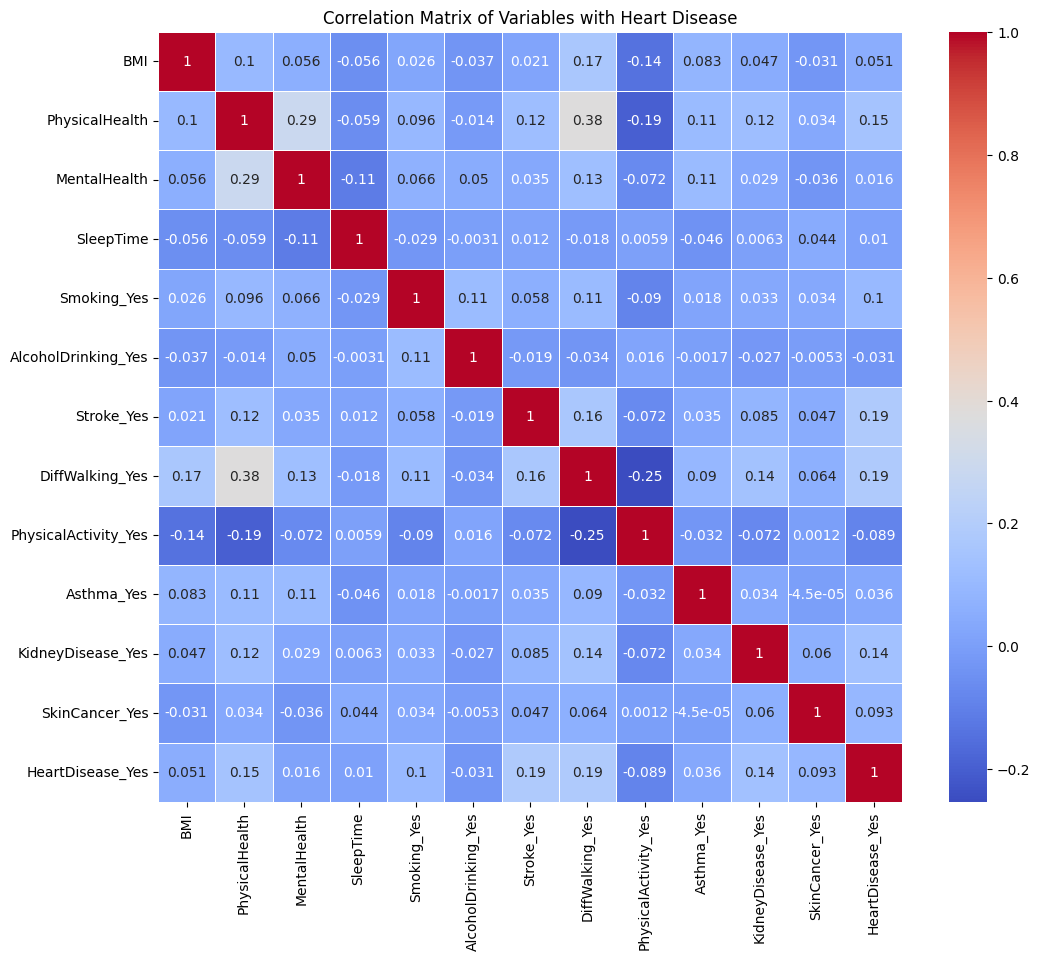

In [38]:
# Connect to MySQL database and read the data into a DataFrame
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)
query = "SELECT * FROM heart_2020_cleaned"
df = pd.read_sql(query, conn)
conn.close()

# Select relevant columns for correlation analysis
columns_of_interest = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
                       'MentalHealth', 'DiffWalking', 'PhysicalActivity', 'SleepTime',
                       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df[columns_of_interest], drop_first=True)

# Calculate correlation matrix (Pearson by default, can use method='spearman' for Spearman correlation)
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Heart Disease')
plt.show()

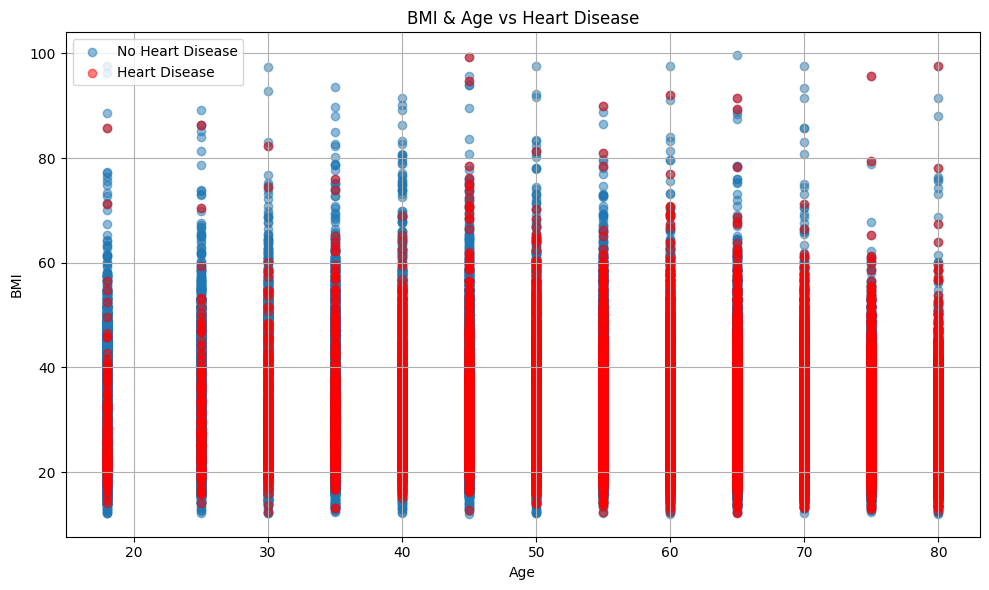

In [40]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)
cursor = conn.cursor()

# Define the SQL query to fetch the required columns
query = (
    "SELECT BMI, AgeCategory, HadHeartAttack, HadAngina, HadStroke "
    "FROM heart_2022_with_nans "
    "WHERE BMI IS NOT NULL AND AgeCategory IS NOT NULL"
)

# Execute the query and fetch the data into a pandas DataFrame
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the cursor and connection
cursor.close()
conn.close()

# Preprocess AgeCategory column to extract numeric values
def extract_age_category(age_str):
    if '-' in age_str:
        age_range = age_str.split('-')
        return (int(age_range[0]) + int(age_range[1])) / 2
    elif 'older' in age_str:
        return int(age_str.split()[1])
    else:
        return int(age_str.split()[1])

df['AgeCategory'] = df['AgeCategory'].apply(extract_age_category)

# Filter the data for individuals with heart disease
heart_disease_data = df[(df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes') | (df['HadStroke'] == 'Yes')]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeCategory'], df['BMI'], label='No Heart Disease', alpha=0.5)
plt.scatter(heart_disease_data['AgeCategory'], heart_disease_data['BMI'], color='red', label='Heart Disease', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI & Age vs Heart Disease')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_57831/2917624631.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


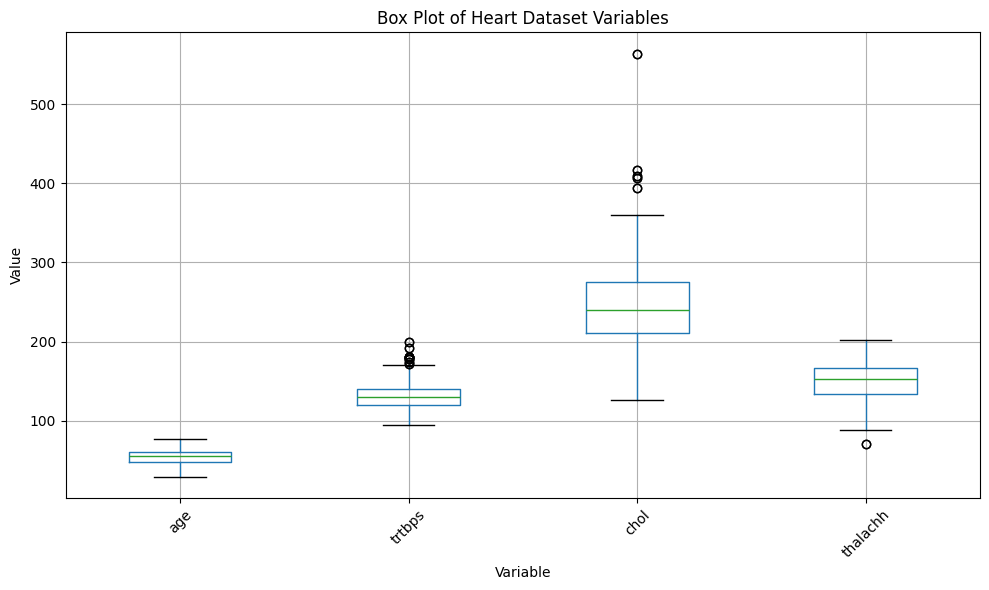

In [43]:
# Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Fetch data from the "heart" table
query = "SELECT age, trtbps, chol, thalachh FROM heart"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=['age', 'trtbps', 'chol', 'thalachh',])
plt.title('Box Plot of Heart Dataset Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()